In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Por questoes de otimizacao de memoria nao eh necessario adicionar o argumento low_memory = True
#O aviso abaixo pode ser ignorado 
df = pd.read_csv("lc_loan.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


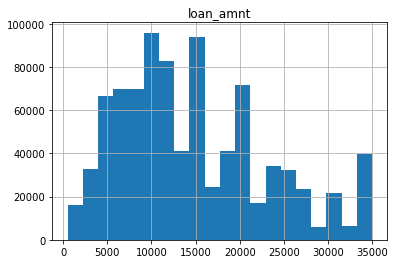

In [4]:
#Valor dos emprestimos concedidos
valor = df.hist(column="loan_amnt", bins=20)

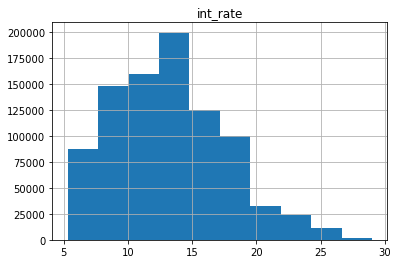

In [5]:
#Taxa das operacoes
taxa = df.hist(column="int_rate", bins=10)

Distribuicao dos ratings de credito:


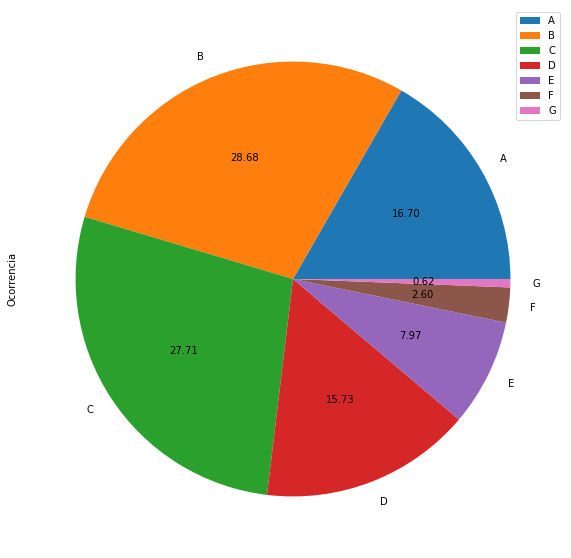

In [10]:
#Risco das operacoes
risco = df["grade"].value_counts().sort_index()

riscodf = pd.DataFrame(index = risco.index)
#riscodf["Risco"] = risco.index
riscodf["Ocorrencia"] = 0
for i in risco.index:
    riscodf["Ocorrencia"][i] = risco[i]
    
riscodf.plot.pie(subplots=True, autopct = '%.2f', figsize=(20,10))
print("Distribuicao dos ratings de credito:")
plt.show()

In [7]:
riscodf

,Ocorrencia
A,148202
B,254535
C,245860
D,139542
E,70705
F,23046
G,5489


In [8]:
#Dataframe focado na alocacao em negocios
df2 = df.loc[df['purpose'] == "small_business"]

In [49]:
#apenas para visualizacao
df2.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

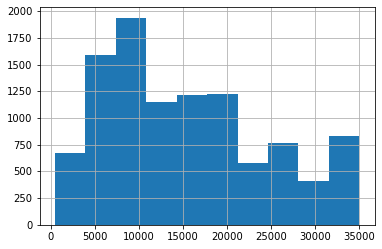

In [60]:
#Valores financiados pelos negocios
df2.loan_amnt.hist()
plt.show()

In [42]:
#Correlacao baixa entre a taxa de juros e o valor financiado. Outros fatores podem ser mais relevantes
print("Correlacao entre valor financiado e taxa de juros: " + str(round(df2["loan_amnt"].corr(df2["int_rate"]), 4)))

Correlacao entre valor financiado e taxa de juros: 0.1973


In [41]:
#Grande parte dos clientes moram em casas hipotecadas ou alugadas
df2['home_ownership'].value_counts()

MORTGAGE    4829
RENT        4540
OWN          994
OTHER         14
Name: home_ownership, dtype: int64

In [58]:
#Os emprestimos para negocios sao claramente considerados mais arriscados que aqueles para consumo pessoal
df2['grade'].value_counts()

D    2564
C    2334
E    1831
B    1480
F     928
A     841
G     399
Name: grade, dtype: int64

Distribuicao do valor das parcelas:


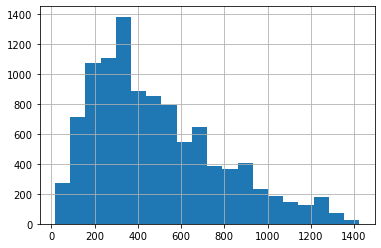

In [53]:
df2['installment'].hist(bins=20)
print("Distribuicao do valor das parcelas:")